# Average performance of best performing hyperparameters for each algorithm in Case 3

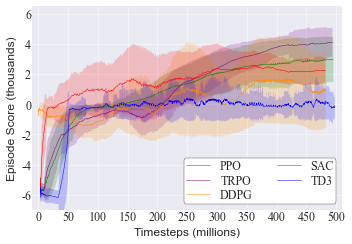

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.pyplot import gca
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
plt.style.use('seaborn')


seed_list = [0, 1, 2, 3, 4]
n_steps=50

fig = plt.figure(figsize=(5, 3.5))

########### On policy results ###############################
algo_list = [ "PPO", "TRPO"]
batch_list_best = [16000, 16000]
color = ['green', 'purple']

for i, algo in enumerate(algo_list):
    batch = batch_list_best[i]
    df_list = []
    for j, seed in enumerate(seed_list):
        fname = ("./Case3/Case3_paper_data/log_"+str(algo)+"_Case3-refined_id-"+str(batch)+"-0.98_"+str(seed)+"_tanh_64_64/monitor.csv")  
        df = pd.read_csv(fname, skiprows=1)
        df['time'] = np.cumsum(df['l'].values)
        df_list.append(df)

    df_all = pd.concat(df_list).sort_values('time')
    timesteps = df_all['time'].rolling(n_steps,min_periods=1).mean()
    smooth_path    = df_all['r'].rolling(n_steps,min_periods=1).mean()/1000
    path_deviation = df_all['r'].rolling(n_steps,min_periods=1).std()/1000
    under_line     = (smooth_path-path_deviation)
    over_line      = (smooth_path+path_deviation)
    plt.plot(timesteps, smooth_path, c=color[i], label=str(algo), linewidth = 0.5, zorder=2)
    art = plt.fill_between(timesteps, under_line, over_line, color=color[i], alpha=.2, edgecolor=None, zorder=1, rasterized=True)
    art.set_edgecolor(None)

########### Off policy results ###############################
algo_list_offpolicy = ["DDPG","SAC","TD3"] 
color = ['darkorange', 'red', 'blue', 'cyan', 'black', 'grey']
tau_list_best = [0.005, 0.005,0.005]
batchsize_list_offpolicy_best = [5000000, 5000000, 50000]

for i, algo_name in enumerate(algo_list_offpolicy):
    batchsize = batchsize_list_offpolicy_best[i]
    tau = tau_list_best[i]
    df_list = []
    for j, seed in enumerate(seed_list):
        identifer = (str(algo_name) + "_Case3_id" + "-" + str(5e5) + "_"+ str(batchsize) 
            + "_"+ str(tau) + "_"+ str(50) + "_"+ str(1e-4) + "_"+ str(seed))
        fname = "./Case3/Case3_paper_data/log_" + identifer + "/monitor.csv"
        df = pd.read_csv(fname, skiprows=1)
        df['time'] = np.cumsum(df['l'].values)
        df_list.append(df)

    df_all = pd.concat(df_list).sort_values('time')
    timesteps = df_all['time'].rolling(n_steps,min_periods=1).mean()
    smooth_path    = df_all['r'].rolling(n_steps,min_periods=1).mean()/1000
    path_deviation = df_all['r'].rolling(n_steps,min_periods=1).std()/1000
    under_line     = (smooth_path-path_deviation)
    over_line      = (smooth_path+path_deviation)
    plt.plot(timesteps, smooth_path, c=color[i], label=str(algo_name), linewidth = 0.5, zorder=2)
    art = plt.fill_between(timesteps, under_line, over_line, color=color[i], alpha=.2, edgecolor=None, zorder=1, rasterized=True)
    art.set_edgecolor(None)

font = font_manager.FontProperties(family='Times New Roman', weight='normal', style='normal', size=12)
leg = plt.legend(ncol=2, loc="lower right", frameon = True,   framealpha=1.0,  labelspacing=0.2, borderpad = 0.2, prop=font)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_facecolor('w')

plt.ylabel('Episode Score (thousands)', fontsize = 12)
plt.yticks([-6, -4, -2, 0, 2, 4, 6], fontsize = 12, fontname='Times New Roman')
gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
plt.setp(plt.gca().get_xaxis().get_offset_text(), visible=False)
plt.ylim([-7, 6.5])

plt.xlabel('Timesteps (millions)', fontsize = 12)
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xticks(np.linspace(0,5e5, 11), fontsize =12, fontname='Times New Roman')
plt.setp(plt.gca().get_xaxis().get_offset_text(), visible=False)
plt.xlim([-0.01e6, 5.1e5])

plt.tick_params(axis='both', which='major', pad=1)
gca().grid(linewidth=0.5)
plt.tight_layout()

plt.savefig('Case3-learning_curve.png', format='png', bbox_inches='tight',dpi=300)
# plt.show()


## Average results for different replay buffer sizes (Off Policy Algorithm)

Batchsize variations were not considered for on policy algorithms for this case.

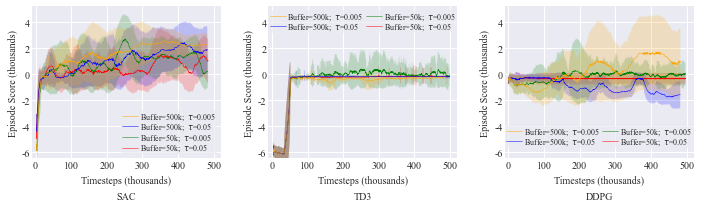

In [2]:
seed_list = [0, 1, 2, 3, 4]
n_steps=50

batchsize_list_offpolicy = [50000, 5000000]
algo_list_offpolicy = ["SAC", "TD3","DDPG"]
color = ['red', 'blue', 'green', 'orange', 'purple', '#1b9e77', '#66a61e', 'darkgrey']
label = ['(a)','(b)','(c)']
tau_list = [0.05, 0.005, 0.001]

fig = plt.figure(figsize=(10,3))

for i, algo_name in enumerate(algo_list_offpolicy):
    plt.subplot(1,3,i+1)
    f = -1
    for tau in tau_list:
        for batchsize in batchsize_list_offpolicy:
            if (algo !="SAC") and (tau != 0.001):
                df_list = []
                f+=1
                for j, seed in enumerate(seed_list):
                    identifer = ( str(algo_name) + "_Case3_id" + "-" + str(5e5) + "_"+ str(batchsize) 
                        + "_"+ str(tau) + "_"+ str(50) + "_"+ str(1e-4 ) + "_"+ str(seed))
                    fname = "./Case3/Case3_paper_data/log_" + identifer + "/monitor.csv"
                    df = pd.read_csv(fname, skiprows=1)
                    df['time'] = np.cumsum(df['l'].values)
                    df_list.append(df)
                   
                df_all = pd.concat(df_list).sort_values('time')
                timesteps = df_all['time'].rolling(n_steps,min_periods=1).mean()
                smooth_path    = df_all['r'].rolling(n_steps,min_periods=1).mean()/1000
                path_deviation = df_all['r'].rolling(n_steps,min_periods=1).std()/1000
                under_line     = (smooth_path-path_deviation)
                over_line      = (smooth_path+path_deviation)
                
                if batchsize == 50000:
                    plt.plot(timesteps, smooth_path, c=color[f], label="Buffer=" + str(int(batchsize/1000)) + r"k;  $\tau$="+ str(tau) , 
                             linewidth = 0.5, zorder=batchsize*10)
                else:
                    plt.plot(timesteps, smooth_path, c=color[f], label="Buffer=" + str(int(batchsize/10000)) + r"k;  $\tau$="+ str(tau) , 
                             linewidth = 0.5, zorder=batchsize*10)

                art = plt.fill_between(df_all['time'].rolling(n_steps,min_periods=1).mean(), under_line, over_line, 
                                       color=color[f], alpha=.2, edgecolor=None, zorder=1)
                art.set_edgecolor(None)

    plt.setp(plt.gca().get_xaxis().get_offset_text(), visible=False)
    plt.xticks(np.linspace(0,10e6, 11), fontsize =10, fontname='Times New Roman')
    plt.xticks(np.linspace(0,0.5e6, 6), fontsize =10, fontname='Times New Roman')
    label[i]=algo_name
    plt.xlabel('Timesteps (thousands)\n'+label[i], fontsize = 10, fontname='Times New Roman',linespacing = 1.75)
    plt.xlim([-0.01e6, 0.52e6])

    plt.setp(plt.gca().get_yaxis().get_offset_text(), visible=False)
    plt.yticks([-5.0, -2.5, 0, 2.5, 5, 7.5, 10, 12.5, 15], fontsize =10, fontname='Times New Roman')
    plt.yticks([-6,-4,-2, 0,2,4,6,], fontsize =10, fontname='Times New Roman')
    plt.ylabel('Episode Score (thousands)', fontsize = 10, fontname='Times New Roman')
    plt.ylim([-6.5, 5.2])

    gca().grid(linewidth=1.0)
    plt.tick_params(axis='both', which='major', pad=2)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
    gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))

    if i == 0:
        font = font_manager.FontProperties(family='Times New Roman',weight='normal',style='normal', size=8)
        handles, labels = gca().get_legend_handles_labels()
        # sort both labels and handles by labels
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
        leg = plt.legend(handles, labels, ncol=1, loc="lower right", frameon = True,   framealpha=0.7,  handletextpad=0.2,
                 labelspacing=0.0, borderpad = 0.1, prop=font, columnspacing=0.3, shadow=None, fancybox = False)
        leg.get_frame().set_linewidth(0.0)
        
    elif i == 1:
        font = font_manager.FontProperties(family='Times New Roman',weight='normal',style='normal', size=8)
        handles, labels = gca().get_legend_handles_labels()
        # sort both labels and handles by labels
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
        leg = plt.legend(handles, labels, ncol=2, loc="upper center", frameon = True,   framealpha=0.7,  handletextpad=0.2,
                 labelspacing=0.0, borderpad = 0.1, prop=font, columnspacing=0.3, shadow=None, fancybox = False)
        leg.get_frame().set_linewidth(0.0)
        
    elif i == 2:
        font = font_manager.FontProperties(family='Times New Roman',weight='normal',style='normal', size=8)
        handles, labels = gca().get_legend_handles_labels()
        # sort both labels and handles by labels
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
        leg = plt.legend(handles, labels, ncol=2, loc="lower center", frameon = True,   framealpha=0.7,  handletextpad=0.2,
                 labelspacing=0.0, borderpad = 0.1, prop=font, columnspacing=0.3, bbox_to_anchor=(0.5, 0.04), shadow=None, fancybox = False)
        leg.get_frame().set_linewidth(0.0)

plt.tight_layout()
plt.savefig('Case3_offpolicy.png', dpi=300,bbox_inches='tight')


# Effect of different numbers of control points

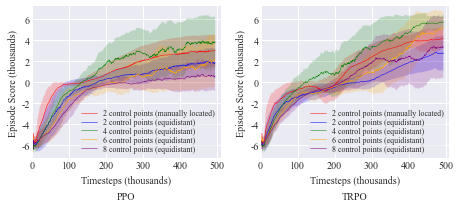

In [3]:

n_steps=50
seed_list = [0, 1, 2, 3, 4]

algo_list = [ "PPO", "TRPO"]
batch_list_best = [16000, 16000]
color = ['red', 'blue', 'green', 'orange', 'purple', '#1b9e77', '#66a61e', 'slateblue']
label = ['(a)','(b)']
ctrl_list = ['mp',2,4,6,8]

fig = plt.figure(figsize=(6.5,3))
for k, algo in enumerate(algo_list):
    plt.subplot(1,2,k+1)
    for i, ctrl_pts in enumerate(ctrl_list):
        batch = batch_list_best[k]
        df_list = []
        for j, seed in enumerate(seed_list):
            if ctrl_pts == 'mp':
                fname = ("./Case3/Case3_paper_data/log_"+str(algo)+"_Case3-refined_id-"+
                 str(batch)+"-0.98_"+str(seed)+"_tanh_64_64/monitor.csv") 
            else:
                fname = ("./Case3/Case3_ctrl-pts/log_"+str(algo)+"_Case3-ctrl_pts_id4-"+ str(ctrl_pts) +"_75_30_500000.0_" +
                     str(batch)+"_5.0_"+str(seed)+"/monitor.csv")  

            df = pd.read_csv(fname, skiprows=1)
            df['time'] = np.cumsum(df['l'].values)
            df['r_avg'] = df['r'].rolling(n_steps).mean()
            df_list.append(df)


        df_comb = pd.concat(df_list, axis=1,)
        df_all = pd.concat(df_list).sort_values('time')

        if ctrl_pts == 'mp':
            plt.plot(df_all['time'].rolling(n_steps,min_periods=1).mean(), 
                     df_all['r'].rolling(n_steps,min_periods=1).mean()/1000, 
                     c=color[i], 
                     label="2 control points (manually located)", 
                     linewidth = 0.5, 
                     zorder=2)
        else:
            plt.plot(df_all['time'].rolling(n_steps,min_periods=1).mean(), 
                     df_all['r'].rolling(n_steps,min_periods=1).mean()/1000, 
                     c=color[i], 
                     label=str(ctrl_pts)+ " control points (equidistant)", 
                     linewidth = 0.5, 
                     zorder=2)
            
        smooth_path, path_deviation    = df_all['r'].rolling(n_steps,min_periods=1).mean()/1000, df_all['r'].rolling(n_steps,min_periods=1).std()/1000
        under_line, over_line     = (smooth_path-path_deviation), (smooth_path+path_deviation)
        plt.fill_between(df_all['time'].rolling(n_steps,min_periods=1).mean(), 
                         under_line, over_line, color=color[i], alpha=.2,zorder=1, edgecolor = None,rasterized=True)

    plt.setp(plt.gca().get_xaxis().get_offset_text(), visible=False)
    plt.xticks(np.linspace(0,10e6, 11), fontsize =10, fontname='Times New Roman')
    plt.xticks(np.linspace(0,5e5, 6), fontsize =10, fontname='Times New Roman')
    label[k]=algo
    plt.xlabel('Timesteps (thousands)\n'+label[k], fontsize = 10, fontname='Times New Roman',linespacing = 1.75)
    plt.xlim([-0.2e1, 5.1e5])
    
    plt.setp(plt.gca().get_yaxis().get_offset_text(), visible=False)
    plt.yticks([-5.0, -2.5, 0, 2.5, 5, 7.5, 10, 12.5, 15], fontsize =10, fontname='Times New Roman')
    plt.yticks([-6,-4, -2, 0,2,4, 6], fontsize =10, fontname='Times New Roman')
    plt.ylabel('Episode Score (thousands)', fontsize = 10, fontname='Times New Roman')
    plt.ylim([-7.3, 7.2])

    gca().grid(linewidth=1.0)
    plt.tick_params(axis='both', which='major', pad=2)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
    gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
    font = font_manager.FontProperties(family='Times New Roman',weight='normal',style='normal', size=8)
    leg = plt.legend(ncol=1, loc="lower right", frameon = True,   framealpha=0.7,  
             labelspacing=0.1, borderpad = 0.2, prop=font, columnspacing=1)
    leg.get_frame().set_linewidth(0.0)

plt.tight_layout()
plt.savefig('Case3_ctrl-pts.png', dpi=300,bbox_inches='tight')
# plt.show()
